<a href="https://colab.research.google.com/github/Sixsamuraip/Other_Work/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.4 MB/s 
     |████████████████████████████████| 9.8 MB 31.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/MLdata'

features.csv  stores.csv  test.csv  train.csv


In [ ]:
feature_path = '/content/drive/MyDrive/MLdata/features.csv'
train_path = '/content/drive/MyDrive/MLdata/train.csv'
store_path = '/content/drive/MyDrive/MLdata/stores.csv'
test_path = '/content/drive/MyDrive/MLdata/test.csv'

feature_df = pd.read_csv(feature_path)
train_df = pd.read_csv(train_path)
store_df = pd.read_csv(store_path)
test_df = pd.read_csv(test_path)

In [ ]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
store_group = train_df.groupby(["Store","Date"])[["Weekly_Sales"]].sum()
store_group.reset_index(inplace=True)

In [ ]:
store_group

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53


In [ ]:
result = pd.merge(store_group, store_df, how='inner', on='Store', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

data = pd.merge(result, feature_df, how='inner', on=['Store','Date'], left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

In [ ]:
data['IsHoliday'].replace({False: 0, True: 1}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Type          6435 non-null   object 
 4   Size          6435 non-null   int64  
 5   Temperature   6435 non-null   float64
 6   Fuel_Price    6435 non-null   float64
 7   MarkDown1     2280 non-null   float64
 8   MarkDown2     1637 non-null   float64
 9   MarkDown3     2046 non-null   float64
 10  MarkDown4     1965 non-null   float64
 11  MarkDown5     2295 non-null   float64
 12  CPI           6435 non-null   float64
 13  Unemployment  6435 non-null   float64
 14  IsHoliday     6435 non-null   int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 804.4+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = (data.Date.dt.year).astype(int)
data['Month'] = (data.Date.dt.month).astype(int)
data['Week'] = ((data.Date.dt.isocalendar().week)*1.0).astype(int)
data['Day'] = (data.Date.dt.day).astype(int)

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2010,2,5,5
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,2010,2,6,12
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,2010,2,7,19
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,2010,2,8,26
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,2010,3,9,5


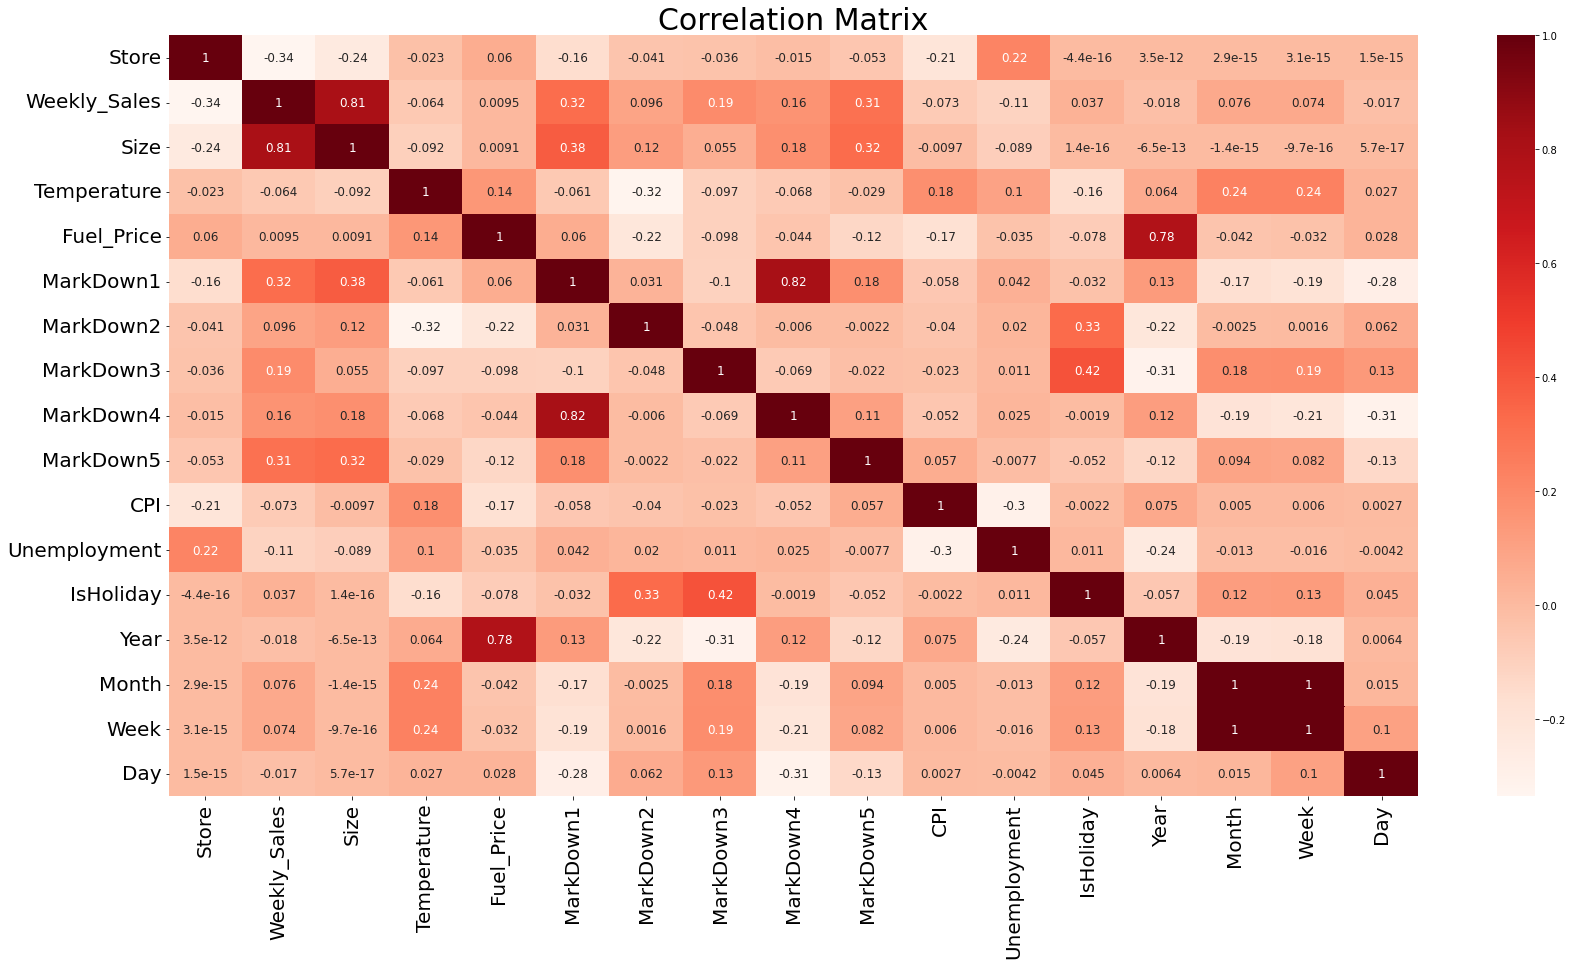

In [ ]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(data.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


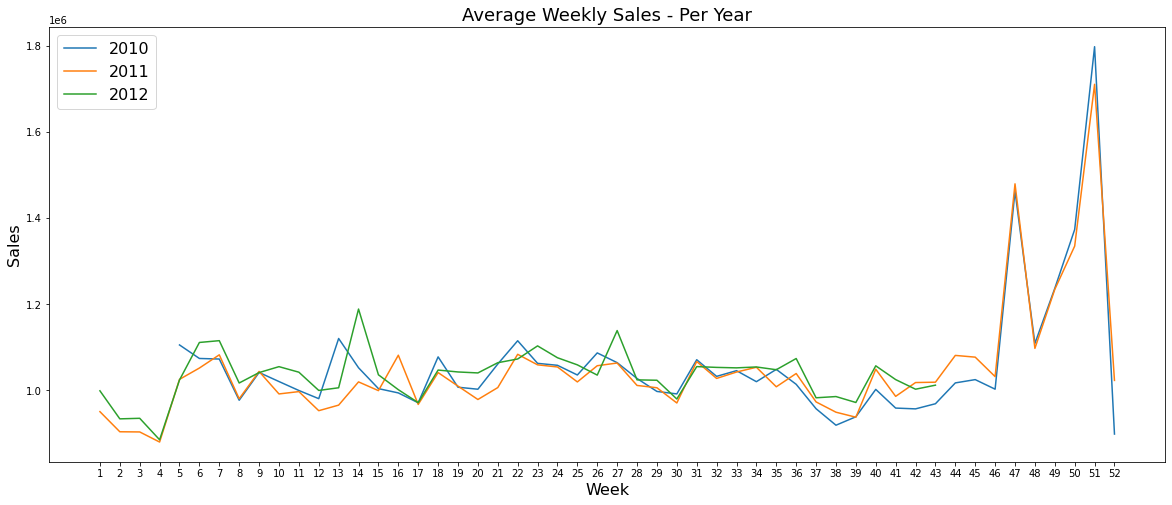

In [ ]:
weekly_sales_2010 = data[data.Year==2010]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2011 = data[data.Year==2011]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2012 = data[data.Year==2012]['Weekly_Sales'].groupby(data['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
#plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [ ]:
store1 = data[data['Store'] == 1 ]

In [ ]:
store1

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2010,2,5,5
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,2010,2,6,12
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,2010,2,7,19
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,2010,2,8,26
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,A,151315,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,0,2012,9,39,28
139,1,2012-10-05,1670785.97,A,151315,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,0,2012,10,40,5
140,1,2012-10-12,1573072.81,A,151315,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,0,2012,10,41,12
141,1,2012-10-19,1508068.77,A,151315,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,0,2012,10,42,19


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


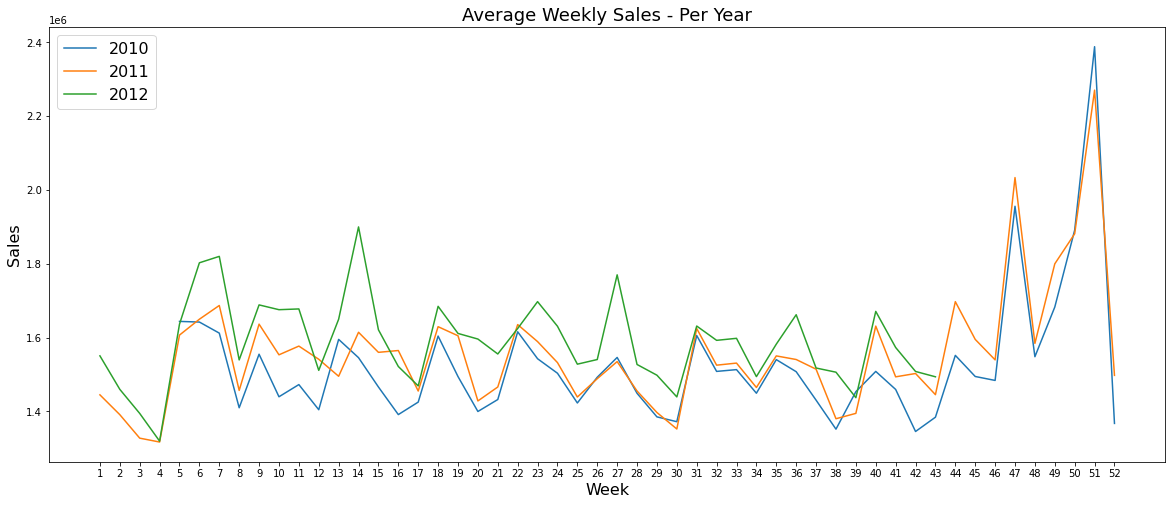

In [ ]:
store1_sales_2010 = store1[store1.Year==2010]['Weekly_Sales'].groupby(store1['Week']).mean()
store1_sales_2012 = store1[store1.Year==2012]['Weekly_Sales'].groupby(store1['Week']).mean()
store1_sales_2011 = store1[store1.Year==2011]['Weekly_Sales'].groupby(store1['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(store1_sales_2010.index, store1_sales_2010.values)
sns.lineplot(store1_sales_2011.index, store1_sales_2011.values)
sns.lineplot(store1_sales_2012.index, store1_sales_2012.values)
#plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


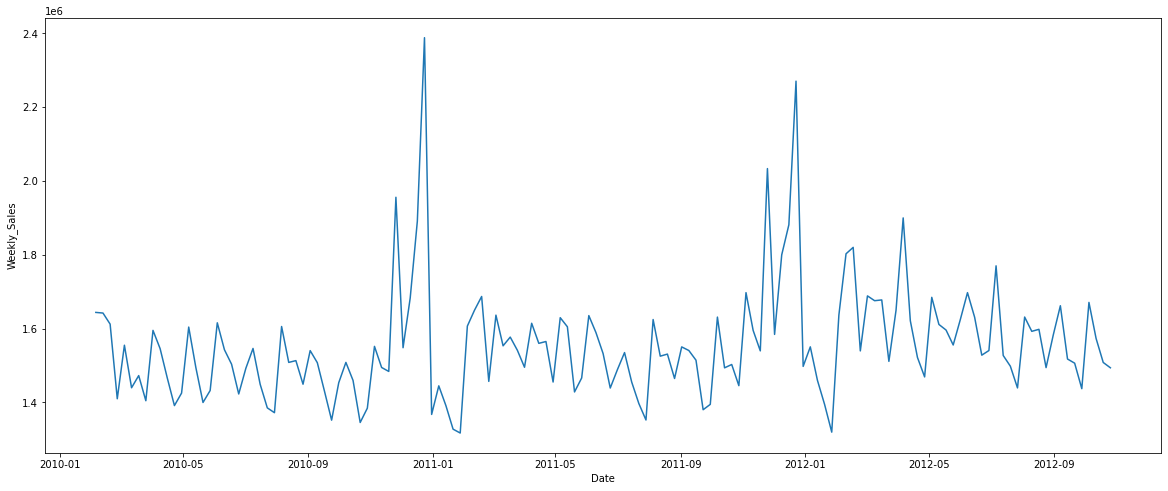

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(store1['Date'],store1['Weekly_Sales'])

In [ ]:
data

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2010,2,5,5
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,2010,2,6,12
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,2010,2,7,19
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,2010,2,8,26
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,0,2012,9,39,28
6431,45,2012-10-05,733455.07,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,0,2012,10,40,5
6432,45,2012-10-12,734464.36,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,0,2012,10,41,12
6433,45,2012-10-19,718125.53,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,0,2012,10,42,19


In [ ]:
data[(data.Store == 1) & (data.Year == 2010)]

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2010,2,5,5
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,2010,2,6,12
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,2010,2,7,19
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,2010,2,8,26
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,A,151315,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,0,2012,9,39,28
139,1,2012-10-05,1670785.97,A,151315,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,0,2012,10,40,5
140,1,2012-10-12,1573072.81,A,151315,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,0,2012,10,41,12
141,1,2012-10-19,1508068.77,A,151315,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,0,2012,10,42,19


In [ ]:
data_train = data[(data.Year <= 2011) | (data.Year == 2012 & ()]

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
store1.shape

(143, 19)

In [ ]:
train_1 = store1.iloc[:-12]
test_1 = store1.iloc[-12:]
train_1.shape
test_1.shape

(12, 19)

In [ ]:
# step_fit = auto_arima(data['Weekly_Sales'],trace = True,surpass_warnings = True)

# step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=173103.554, Time=6.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=174457.419, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=173626.224, Time=1.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=173359.721, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=174455.423, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=173301.748, Time=6.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=173266.524, Time=6.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=172741.309, Time=8.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=172905.020, Time=8.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=172730.428, Time=10.80 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=172847.176, Time=3.42 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=172588.751, Time=19.60 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=172597.113, Time=5.45 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=172572.018, Time=17.65 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6435
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -86246.576
Date:                Wed, 19 Oct 2022   AIC                         172513.152
Time:                        17:09:57   BIC                         172580.846
Sample:                             0   HQIC                        172536.578
                               - 6435                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1418      0.042     -3.339      0.001      -0.225      -0.059
ar.L2         -0.1879      0.047     -3.960      0.000      -0.281      -0.095
ar.L3         -0.0723      0.050     -1.433      0.152      -0.171       0.027
ar.L4          0.1119      0.041      2.718      0.007       0.031       0.193
ma.L1         -0.2419      0.043     -5.619      0.000      -0.326      -0.158
ma.L2          0.0659      0.044      1.504      0.133      -0.020       0.152
ma.L3         -0.1461      0.043     -3.388      0.001      -0.231      -0.062
ma.L4          0.0855      0.033      2.612      0.009       0.021       0.150
ma.L5         -0.2787      0.028    -10.044      0.000      -0.333      -0.224
sigma2      2.582e+10   3.97e-12   6.49e+21      0.000    2.58e+10    2.58e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):            104389.99
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.73e+36. Standard errors may be unstable.
"""

In [ ]:
# step_fit1 = auto_arima(store1['Weekly_Sales'],trace = True,surpass_warnings = True)

# step_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.13 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Wed, 19 Oct 2022   AIC                           3807.686
Time:                        17:10:03   BIC                           3825.421
Sample:                             0   HQIC                          3814.893
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+37. Standard errors may be unstable.
"""

In [ ]:
train_1

,Store,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2010,2,5,5
1,1,2010-02-12,1641957.44,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,2010,2,6,12
2,1,2010-02-19,1611968.17,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,2010,2,7,19
3,1,2010-02-26,1409727.59,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,2010,2,8,26
4,1,2010-03-05,1554806.68,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,2012-07-06,1769854.16,A,151315,81.57,3.227,12218.76,94.40,192.83,4066.01,6149.04,221.883779,6.908,0,2012,7,27,6
127,1,2012-07-13,1527014.04,A,151315,77.12,3.256,7218.13,45.20,36.24,3909.38,2596.37,221.924158,6.908,0,2012,7,28,13
128,1,2012-07-20,1497954.76,A,151315,80.42,3.311,3213.00,313.72,9.53,2262.02,3228.19,221.932727,6.908,0,2012,7,29,20
129,1,2012-07-27,1439123.71,A,151315,82.66,3.407,7146.90,389.02,1.59,10267.54,4325.19,221.941295,6.908,0,2012,7,30,27


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model1 = ARIMA(train_1['Weekly_Sales'],order = (5,1,5))
model1 = model1.fit()

In [ ]:
start1 = len(train_1)
end1 = len(train_1)+len(test_1)-1
predict1 = model1.predict(start=0,end=start1,dynamic=True)

In [ ]:
test_1['Weekly_Sales']

131    1592409.97
132    1597868.05
133    1494122.38
134    1582083.40
135    1661767.33
136    1517428.87
137    1506126.06
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: Weekly_Sales, dtype: float64

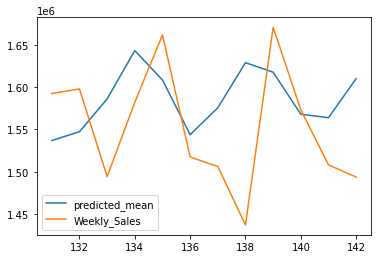

In [ ]:
predict1.plot(legend=True)
test_1['Weekly_Sales'].plot(legend=True)

In [ ]:
store2 = data[data['Store'] == 2 ]
store3 = data[data['Store'] == 3 ]
store4 = data[data['Store'] == 4 ]
store5 = data[data['Store'] == 5 ]

store2 = store2.reset_index()
store3 = store3.reset_index()
store4 = store4.reset_index()
store5 = store5.reset_index()

In [ ]:
train_2 = store2.iloc[:-12]
train_3 = store3.iloc[:-12]
train_4 = store4.iloc[:-12]
train_5 = store5.iloc[:-12]

test_2 = store2.iloc[-12:]
test_3 = store3.iloc[-12:]
test_4 = store4.iloc[-12:]
test_5 = store5.iloc[-12:]

In [ ]:
model2 = ARIMA(train_2['Weekly_Sales'],order = (5,1,5))
model2 = model2.fit()

model3 = ARIMA(train_3['Weekly_Sales'],order = (5,1,5))
model3 = model3.fit()

model4 = ARIMA(train_4['Weekly_Sales'],order = (5,1,5))
model4 = model4.fit()

model5 = ARIMA(train_5['Weekly_Sales'],order = (5,1,5))
model5 = model5.fit()

In [ ]:
start2 = len(train_2)
end2 = len(train_2)+len(test_2)-1
predict2 = model2.predict(start=start2,end=end2,dynamic=True)

In [ ]:
predict2.plot(legend=True)
test_2['Weekly_Sales'].plot(legend=True)

In [ ]:
start3 = len(train_3)
end3 = len(train_3)+len(test_3)-1
predict3 = model3.predict(start=start3,end=end3,dynamic=True)

In [ ]:
predict3.plot(legend=True)
test_3['Weekly_Sales'].plot(legend=True)

In [ ]:
start4 = len(train_4)
end4 = len(train_4)+len(test_3)-1
predict4 = model4.predict(start=start4,end=end4,dynamic=True)

In [ ]:
predict4.plot(legend=True)
test_4['Weekly_Sales'].plot(legend=True)

In [ ]:
start5 = len(train_5)
end5 = len(train_5)+len(test_3)-1
predict5 = model5.predict(start=start5,end=end5,dynamic=True)

In [ ]:
predict5.plot(legend=True)
test_5['Weekly_Sales'].plot(legend=True)

# **SARIMAX**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sari_1 = SARIMAX(train_1['Weekly_Sales'],order = (0,1,0),sesonal = (5,1,5,52))
sari_1 = sari_1.fit()

In [ ]:
start1 = len(train_1)
end1 = len(train_1)+len(test_1)-1
predict1 = sari_1.predict(start=start1,end=end1+30,dynamic=True)

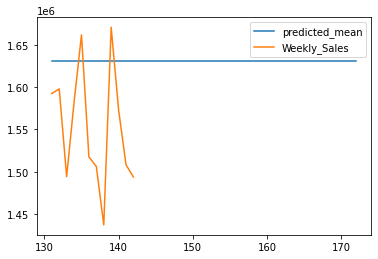

In [ ]:
predict1.plot(legend=True)
test_1['Weekly_Sales'].plot(legend=True)

# **test pre**

In [ ]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
test_group = test_df.groupby(["Store","Date"])[[]].sum()
test_group.reset_index(inplace=True)

In [ ]:
test_group

,Store,Date
0,1,2012-11-02
1,1,2012-11-09
2,1,2012-11-16
3,1,2012-11-23
4,1,2012-11-30
...,...,...
1750,45,2013-06-28
1751,45,2013-07-05
1752,45,2013-07-12
1753,45,2013-07-19


In [ ]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
result_test = pd.merge(test_group, store_df, how='left', on='Store', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

data_test = pd.merge(result_test, feature_df, how='inner', on=['Store','Date'], left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

In [ ]:
data_test

,Store,Date,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2012-11-02,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False
1,1,2012-11-09,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
2,1,2012-11-16,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
3,1,2012-11-23,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
4,1,2012-11-30,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,45,2013-06-28,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
1751,45,2013-07-05,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
1752,45,2013-07-12,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
1753,45,2013-07-19,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
data_test['IsHoliday'].replace({False: 0, True: 1}, inplace=True)

In [ ]:
data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test['Year'] = (data_test.Date.dt.year).astype(int)
data_test['Month'] = (data_test.Date.dt.month).astype(int)
data_test['Week'] = ((data_test.Date.dt.isocalendar().week)*1.0).astype(int)
data_test['Day'] = (data_test.Date.dt.day).astype(int)

In [ ]:
data_test = data_test.drop(columns = ['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Unemployment','Year','Month','Week','Day'],axis = 1)

In [ ]:
test_1 = data_test[data_test['Store'] == 1]

In [ ]:
test_1.head()

,Store,Date,Type,Size,CPI,IsHoliday
0,1,2012-11-02,A,151315,223.462779,0
1,1,2012-11-09,A,151315,223.481307,0
2,1,2012-11-16,A,151315,223.512911,0
3,1,2012-11-23,A,151315,223.561947,1
4,1,2012-11-30,A,151315,223.610984,0


In [ ]:
testset_1_for_prediction=test_1.dropna()

In [ ]:
testset_1_for_prediction = testset_1_for_prediction.drop(['Size','IsHoliday'],axis = 1)

In [ ]:
testset_1_for_prediction.head()

,Store,Date,Type,CPI
0,1,2012-11-02,A,223.462779
1,1,2012-11-09,A,223.481307
2,1,2012-11-16,A,223.512911
3,1,2012-11-23,A,223.561947
4,1,2012-11-30,A,223.610984


# **SARIMAX V2**

In [ ]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
store1 = data[data['Store'] == 1 ]

In [ ]:
store1[['CPI','Weekly_Sales']]

,CPI,Weekly_Sales
0,211.096358,1643690.90
1,211.242170,1641957.44
2,211.289143,1611968.17
3,211.319643,1409727.59
4,211.350143,1554806.68
...,...,...
138,222.981658,1437059.26
139,223.181477,1670785.97
140,223.381296,1573072.81
141,223.425723,1508068.77


In [ ]:
store1_1 = store1.drop(columns = ['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Unemployment','Year','Month','Week','Day'],axis = 1)

In [ ]:
store1_1.head()

,Store,Date,Weekly_Sales,Type,Size,CPI,IsHoliday
0,1,2010-02-05,1643690.90,A,151315,211.096358,0
1,1,2010-02-12,1641957.44,A,151315,211.242170,1
2,1,2010-02-19,1611968.17,A,151315,211.289143,0
3,1,2010-02-26,1409727.59,A,151315,211.319643,0
4,1,2010-03-05,1554806.68,A,151315,211.350143,0


In [ ]:
dataset_for_prediction=store1_1.dropna()

In [ ]:
dataset_grouped = dataset_for_prediction.groupby(['Date','Store','CPI'])['Weekly_Sales'].sum().reset_index()

In [ ]:
dataset_grouped

,Date,Store,CPI,Weekly_Sales
0,2010-02-05,1,211.096358,1643690.90
1,2010-02-12,1,211.242170,1641957.44
2,2010-02-19,1,211.289143,1611968.17
3,2010-02-26,1,211.319643,1409727.59
4,2010-03-05,1,211.350143,1554806.68
...,...,...,...,...
138,2012-09-28,1,222.981658,1437059.26
139,2012-10-05,1,223.181477,1670785.97
140,2012-10-12,1,223.381296,1573072.81
141,2012-10-19,1,223.425723,1508068.77


In [ ]:
Store1 = dataset_grouped[(dataset_grouped.Store==1)]
steps=-1
dataset_for_prediction1= Store1.copy()
dataset_for_prediction1['Actual_sales']=dataset_for_prediction1['Weekly_Sales'].shift(steps)
dataset_for_prediction1=dataset_for_prediction1.dropna()
dataset_for_prediction1['Date'] =pd.to_datetime(dataset_for_prediction1['Date'])
dataset_for_prediction1.index= dataset_for_prediction1['Date']
# dataset_for_prediction1.head()
X = dataset_for_prediction1[['Store','CPI']]
y = dataset_for_prediction1[['Actual_sales']]
y.rename(columns={'Actual_sales':'Next_week_Sale'},inplace = True)
train_size=int(len(Store1) *0.7)
test_size = int(len(Store1)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_X

,Store,CPI
Date,,
2010-02-05,1,211.096358
2010-02-12,1,211.242170
2010-02-19,1,211.289143
2010-02-26,1,211.319643
2010-03-05,1,211.350143
...,...,...
2011-12-02,1,218.714733
2011-12-09,1,218.961846
2011-12-16,1,219.179453


In [ ]:
model= SARIMAX(train_y, seasonal_order=(0,1,0,52),
 exog=train_X,
 order=(0,1,0),
 enforce_invertibility=False, enforce_stationarity=False)

results= model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Next_week_Sale   No. Observations:                  100
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -652.642
Date:                            Thu, 20 Oct 2022   AIC                           1311.284
Time:                                    07:49:11   BIC                           1316.770
Sample:                                02-05-2010   HQIC                          1313.340
                                     - 12-30-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Store               0         -0        nan        nan           0           0
CPI         4770.5450   1.88e+06      0.003      0.998   -3.69e+06     3.7e+06
sigma2       3.28e+11   9.88e+10      3.321      0.001    1.34e+11    5.22e+11
===================================================================================
Ljung-Box (L1) (Q):                  11.77   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               1.40   Skew:                             0.24
Prob(H) (two-sided):                  0.52   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2012-01-06 to 2012-10-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Store   42 non-null     int64  
 1   CPI     42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [ ]:
train_size+test_size+(steps)-1

141

In [ ]:
train_size

100

In [ ]:
steps

-1

In [ ]:
predictions= results.predict(start =0, end=train_size-1,exog=test_X)

In [ ]:
predictions2= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

In [ ]:
predictions = predictions.drop(columns='Actual_sales')

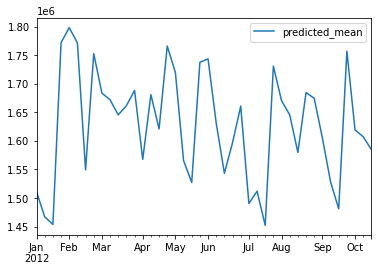

In [ ]:
predictions2.plot(legend=True)

In [ ]:
predictions.head()

NameError: ignored

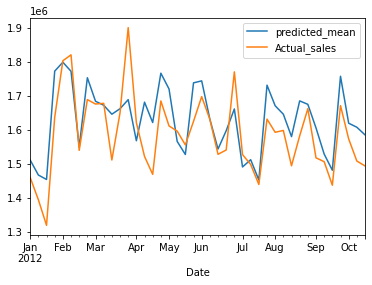

In [ ]:
predictions.plot(legend=True)
#train_X['Weekly_Sales'].plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse
error=rmse(train_X['Weekly_Sales'],predictions)
error

169316.75910058696

In [ ]:
Final_predictions.head()

,predicted_mean,Actual_sales,Next_week_Sale
Date,,,
2012-01-06,1.510867e+06,1459601.17,1459601.17
2012-01-13,1.466988e+06,1394393.84,1394393.84
2012-01-20,1.453882e+06,1319325.59,1319325.59
2012-01-27,1.771928e+06,1636339.65,1636339.65
2012-02-03,1.798132e+06,1802477.43,1802477.43


In [ ]:

predictions

In [ ]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)
#predictions= results.predict(start =0, end=train_size-1,exog=test_X)
act= pd.DataFrame(y.iloc[train_size:, :])
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual_sales'] = act['Next_week_Sale']
predictions.rename(columns={0:'Pred_sales'}, inplace=True)
#Final_predictions = pd.concat([predictions,act],axis=1)
#Final_predictions['Pred_sales'].plot(legend=True, color='red', figsize=(20,8))
fig=Final_predictions['Pred_sales'].plot(legend=True, color='red', figsize=(10,4))
fig=dataset_for_prediction1['Actual_sales'].plot(legend=True, color='blue')
# fig.set_figheight(4)
plt.show()

KeyError: ignored

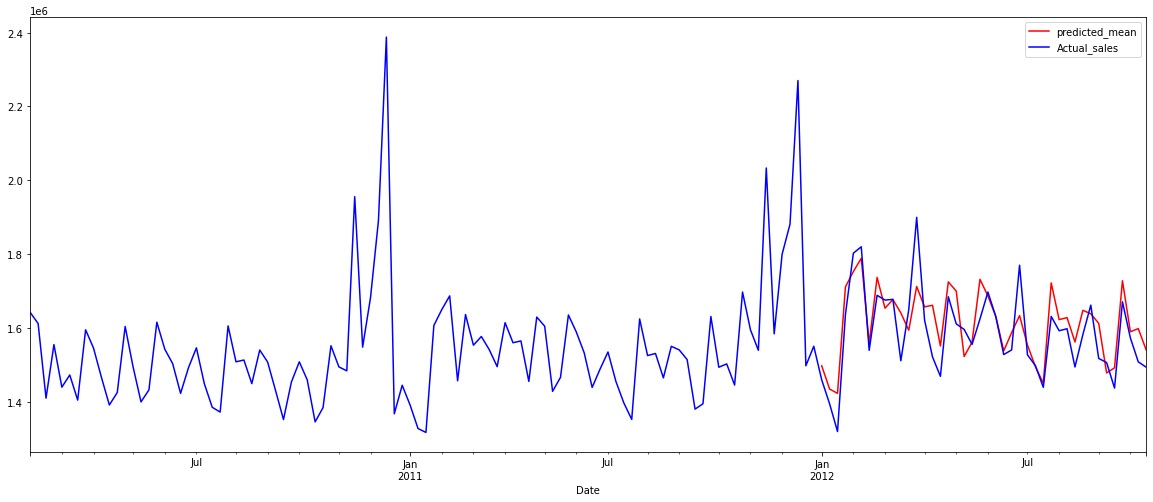

In [ ]:
%matplotlib inline
# steps = -1
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)
act= pd.DataFrame(y.iloc[train_size:, :])
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual_sales'] = act['Next_week_Sale']
predictions.rename(columns={0:'Pred_sales'}, inplace=True)
Final_predictions = pd.concat([predictions,act],axis=1)
Final_predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))
# dataset_for_prediction2['Actual_sales'].plot(legend=True, color='blue', figsize=(20,8))
#fig=Final_predictions['Pred_sales'].plot(legend=True, color='red', figsize=(10,4))
fig=dataset_for_prediction1['Actual_sales'].plot(legend=True, color='blue')
# fig.set_figheight(4)
plt.show()

# **predict test**

In [ ]:
dataset_for_prediction1.head()

,Date,Store,CPI,Weekly_Sales,Actual_sales
Date,,,,,
2010-02-05,2010-02-05,1,211.096358,1643690.90,1641957.44
2010-02-12,2010-02-12,1,211.242170,1641957.44,1611968.17
2010-02-19,2010-02-19,1,211.289143,1611968.17,1409727.59
2010-02-26,2010-02-26,1,211.319643,1409727.59,1554806.68
2010-03-05,2010-03-05,1,211.350143,1554806.68,1439541.59


In [ ]:
testset_1_for_prediction.head()

,Store,Date,Type,CPI
0,1,2012-11-02,A,223.462779
1,1,2012-11-09,A,223.481307
2,1,2012-11-16,A,223.512911
3,1,2012-11-23,A,223.561947
4,1,2012-11-30,A,223.610984


In [ ]:
predictions= results.predict(start =0, end=len(testset_1_for_prediction),exog=dataset_for_prediction1[['Store','CPI']])

In [ ]:
predictions

2010-02-05    1.007045e+06
2010-02-12    1.642653e+06
2010-02-19    1.612192e+06
2010-02-26    1.409873e+06
2010-03-05    1.554952e+06
2010-03-12    1.439687e+06
2010-03-19    1.471729e+06
2010-03-26    1.403487e+06
2010-04-02    1.594026e+06
2010-04-09    1.544476e+06
2010-04-16    1.465418e+06
2010-04-23    1.391020e+06
2010-04-30    1.424864e+06
2010-05-07    1.603719e+06
2010-05-14    1.494239e+06
2010-05-21    1.400996e+06
2010-05-28    1.433404e+06
2010-06-04    1.616859e+06
2010-06-11    1.543895e+06
2010-06-18    1.503273e+06
2010-06-25    1.422162e+06
2010-07-02    1.491869e+06
2010-07-09    1.545525e+06
2010-07-16    1.448901e+06
2010-07-23    1.385708e+06
2010-07-30    1.372629e+06
2010-08-06    1.606135e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64